<a href="https://colab.research.google.com/github/SedyaPrograms/Tutorial/blob/main/AI%20and%20machine%20learning/5_%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* ### imports


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

* ### Constants


In [ ]:
RANDOM_SEED = 55

* ### dataset

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1500,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           flip_y=0.03,
                           random_state=RANDOM_SEED)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15,
                                                    random_state=RANDOM_SEED)

* ### gradient descent (logistic regression)

In [ ]:
from sklearn.metrics import accuracy_score

def sigmoid(x, w):
       return (1.0 / (1 + np.exp(- x @ w ))).reshape(-1)

def loss(x, y_true, w):
    n = len(y_true)

    sigmoid_result = sigmoid(x, w)
    zero_class = y_true * np.log(sigmoid_result)
    one_class = (1 - y_true) * np.log(1 - sigmoid_result)

    assert y_true.shape == zero_class.shape, '{} != {}'.format(y_true.shape, zero_class.shape)
    assert y_true.shape == one_class.shape, '{} != {}'.format(y_true.shape, one_class.shape)

    logloss = np.sum(zero_class + one_class) / n
    return -logloss

def loss_grad(x, y_true, w):
    n = len(y_true)
    sigmoid_result = sigmoid(x, w)


    grad = (x.T @  -(y_true - sigmoid_result)) / n 
    grad *= 2 * alpha * ()


    return grad


def prediction(x, w):
    return np.where(sigmoid(x, w) > 0.5, 1, 0)

def gradient_descent(X_train, y_train, X_test, y_test, epochs=10, lr=0.001):
    _, n_features = X_train.shape
    w = np.zeros((n_features + 1))


    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))


    loss_train = [loss(X_train, y_train, w)]
    loss_test = [loss(X_test, y_test, w)]
    accuracy_test = [accuracy_score(y_test, prediction(X_test, w))]

    epoch = 0
    while epoch < epochs:

        grad = loss_grad(X_train, y_train, w)

        loss_train.append(loss(X_train, y_train, w))
        loss_test.append(loss(X_test, y_test, w))
        accuracy_test.append(accuracy_score(y_test, prediction(X_test, w)))
        w -= lr * grad


        epoch += 1
    return w, loss_train, loss_test, accuracy_test

In [ ]:
w, loss_train, loss_test, accuracy_test = gradient_descent(X_train, y_train, X_test, y_test, epochs=1000)

Text(0, 0.5, 'Loss')

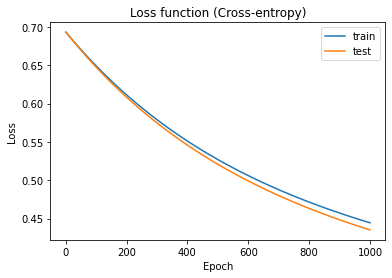

In [ ]:
plt.plot(np.arange(0, len(loss_train)), loss_train, label='train')
plt.plot(np.arange(0, len(loss_test)), loss_test, label='test')
plt.legend()

plt.title('Loss function (Cross-entropy)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

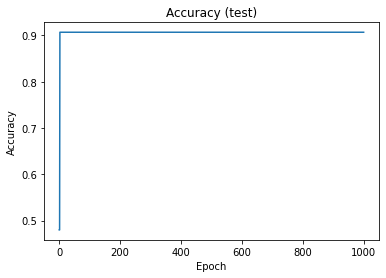

In [ ]:
plt.plot(np.arange(0, len(accuracy_test)), accuracy_test)

plt.title('Accuracy (test)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [ ]:
X_test_stacked = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

In [ ]:
pred = prediction(X_test_stacked, w)

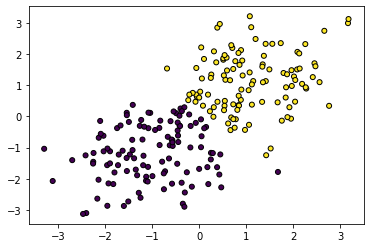

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=pred, s=25, edgecolor="k")

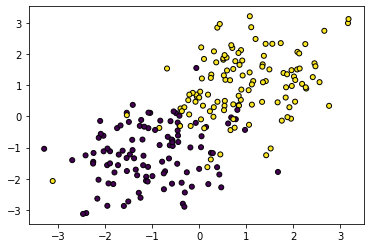

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test, s=25, edgecolor="k")

# sklearn.LogisticRegression


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='none')
logreg.fit(X_train, y_train)

LogisticRegression(penalty='none')

In [ ]:
logreg.coef_, logreg.intercept_

(array([[2.67541349]]), array([0.67626732]))

In [ ]:
accuracy_score(X_test, y_test)

ValueError: ignored